<a href="https://colab.research.google.com/github/ToonToonToon/229352-StatisticalLearning/blob/main/229351_LAB03_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 3 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

1. ให้เริ่มทำปฏิบัติการจาก colab notebook ที่กำหนดให้ จากนั้นบันทึกเป็นไฟล์ *.pdf

### ในปฏิบัติการนี้เราจะฝึกการทำ PCA ด้วยสองวิธี คือ
1. หาด้วยการแยกส่วนประกอบของเมทริกซ์ผ่าน numpy
2. หาด้วยการใช้เครื่องมือที่มีมาให้ใน scikit-learn

ดาวน์โหลดข้อมูลสัตว์ต่างๆ 50 ชนิดดังนี้  
ชนิดสัตว์: https://donlapark.pages.dev/229351/data/classes.txt  
ตัวแปรต่างๆ: https://donlapark.pages.dev/229351/data/predicates.txt  
ค่าของสัตว์แต่ละชนิด: https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

In [1]:
!pip install -q wget

import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA



  Preparing metadata (setup.py) ... done


In [2]:
# Download the files
!wget -O classes.txt https://donlapark.pages.dev/229351/data/classes.txt
!wget -O predicate-matrix-continuous.txt https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt

--2025-07-17 03:39:17--  https://donlapark.pages.dev/229351/data/classes.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 755 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     755  --.-KB/s    in 0s      

2025-07-17 03:39:17 (10.7 MB/s) - ‘classes.txt’ saved [755/755]

--2025-07-17 03:39:17--  https://donlapark.pages.dev/229351/data/predicate-matrix-continuous.txt
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29800 (29K) [text/plain]
Saving to: ‘predicate-matrix-continuous.txt’

predicate-matrix-co 100%[===================>]  

In [3]:
classes = np.genfromtxt('classes.txt',dtype='str')

classes[:5]

array([['1', 'antelope'],
       ['2', 'grizzly+bear'],
       ['3', 'killer+whale'],
       ['4', 'beaver'],
       ['5', 'dalmatian']], dtype='<U15')

In [4]:
data = np.genfromtxt('predicate-matrix-continuous.txt')

data[:5,:5]

array([[-1.  , -1.  , -1.  , -1.  , 12.34],
       [39.25,  1.39,  0.  , 74.14,  3.75],
       [83.4 , 64.79,  0.  ,  0.  ,  1.25],
       [19.38,  0.  ,  0.  , 87.81,  7.5 ],
       [69.58, 73.33,  0.  ,  6.39,  0.  ]])

#### Exercise 1

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ฟังก์ชัน $\texttt{np.linalg.eigh}$  
ดังนั้น เมทริกซ์ที่ได้ต้องมีขนาด 50x2

$$ \Sigma =
  \begin{pmatrix}
\text{var}(X_1) & \text{cov}(X_1,X_2) & \cdots & \text{cov}(X_1,X_{85}) \\
\text{cov}(X_2,X_1) & \text{var}(X_2) & \cdots & \text{cov}(X_2,X_{85}) \\
\vdots & \vdots & \ddots & \vdots \\
\text{cov}(X_{85},X_1) & \text{cov}(X_{85},X_1) & \cdots & \text{var}(X_{85}) \\
\end{pmatrix}
 $$

In [9]:
#TODO : enter code here
data = np.genfromtxt('predicate-matrix-continuous.txt')
data_centered = data - np.mean(data, axis=0)

covariance_matrix = np.cov(data_centered, rowvar=False)

eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

principal_components = eigenvectors_sorted[:, :2]

data_pca_numpy = np.dot(data_centered, principal_components)

print("Shape of PCA transformed data (numpy):", data_pca_numpy.shape)


Shape of PCA transformed data (numpy): (50, 2)


#### OPTIONAL

ใน code block ข้างล่างนี้ จงทำ PCA บนข้อมูลที่ได้มาให้เหลือเมทริกซ์ข้อมูลที่มีตัวแปรแค่ 2 ตัว โดยใช้ $scikit-learn$  
พร้อมกับตรวจสอบว่าเมทริกซ์ที่ได้จากทั้งสองวิธีนี้มีค่าเท่ากัน (ต่างกันแค่ค่าบวกลบ)

In [10]:
#TODO (optional): enter code here
pca_sklearn = PCA(n_components=2)

data_pca_sklearn = pca_sklearn.fit_transform(data)

print("Shape of PCA transformed data (sklearn):", data_pca_sklearn.shape)

print("\nComparing numpy and sklearn PCA results (first 5 rows):")
print("Numpy PCA:\n", data_pca_numpy[:5])
print("Sklearn PCA:\n", data_pca_sklearn[:5])


Shape of PCA transformed data (sklearn): (50, 2)

Comparing numpy and sklearn PCA results (first 5 rows):
Numpy PCA:
 [[  14.33200256  106.35992505]
 [ -58.9630861   -76.22681969]
 [ 170.08767172 -139.3662367 ]
 [  31.85582565  -54.04638157]
 [ -29.65753503  -11.3917049 ]]
Sklearn PCA:
 [[  14.33200256  106.35992505]
 [ -58.9630861   -76.22681969]
 [ 170.08767172 -139.3662367 ]
 [  31.85582565  -54.04638157]
 [ -29.65753503  -11.3917049 ]]


#### Exercise 2

ทำการพล็อตจุดของข้อมูลที่ได้จาก PCA ข้างบนพร้อมกับใส่คำกำกับว่าจุดไหนเป็นของสัตว์ชนิดใดโดยใช้ชื่อสัตว์จาก classes.txt

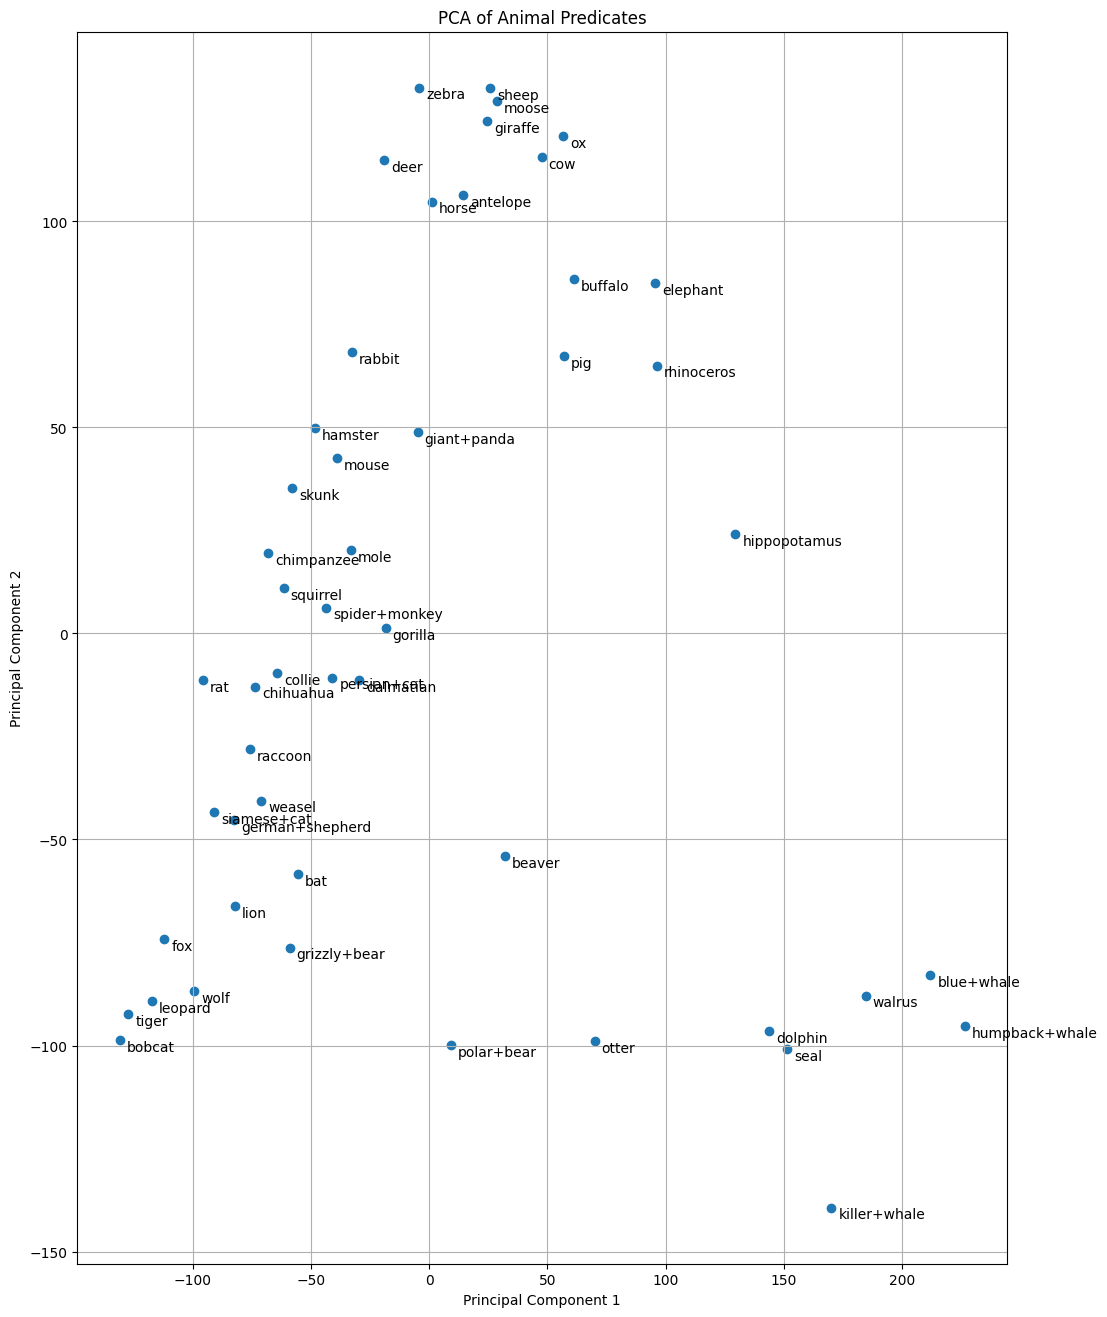

In [11]:
classes = np.genfromtxt('classes.txt', dtype='str')
data = np.genfromtxt('predicate-matrix-continuous.txt')
data_centered = data - np.mean(data, axis=0)
covariance_matrix = np.cov(data_centered, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors_sorted = eigenvectors[:, sorted_indices]
principal_components = eigenvectors_sorted[:, :2]
data_pca = np.dot(data_centered, principal_components)

plt.figure(figsize=(12, 16))

plt.scatter(data_pca[:, 0], data_pca[:, 1])

for i in range(50):
    plt.annotate(
        classes[i, 1],  # Animal name from classes.txt
        xy=(data_pca[i, 0], data_pca[i, 1]),  # Coordinates of the point
        xytext=(5, -8),  # Offset for the text from the point
        textcoords='offset points'
    )

plt.title('PCA of Animal Predicates')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

#### Exercise 3

หากลุ่มสัตว์ต่างๆ ที่อยู่ใกล้กันมา 4 กลุ่ม แล้วลองอธิบายว่าสัตว์ในแต่ละกลุ่มมีอะไรที่เหมือนกัน

กลุ่มที่ 1: สัตว์เลี้ยงลูกด้วยนมในน้ำ (Aquatic Mammals)

สัตว์ในกลุ่ม: วาฬสีน้ำเงิน (blue+whale), วาฬหลังค่อม (humpback+whale), โลมา (dolphin), วอลรัส (walrus), แมวน้ำ (seal)

ลักษณะร่วม: สัตว์เหล่านี้เป็นสัตว์เลี้ยงลูกด้วยนมที่อาศัยอยู่ในทะเล มีคุณสมบัติที่เกี่ยวข้องกับการว่ายน้ำ การดำรงชีวิตในมหาสมุทร และอาจจะรวมถึงอาหารการกิน (เช่น กินปลา)

กลุ่มที่ 2: สัตว์กินพืชขนาดใหญ่ในแอฟริกา (Large African Herbivores)

สัตว์ในกลุ่ม: ช้าง (elephant), ฮิปโปโปเตมัส (hippopotamus), แรด (rhinoceros), ยีราฟ (giraffe), ควายป่า (buffalo)

ลักษณะร่วม: เป็นสัตว์กินพืชขนาดใหญ่ที่พบได้บ่อยในทุ่งหญ้าสะวันนาของแอฟริกา มีขนาดตัวใหญ่ และลักษณะการกินพืชที่คล้ายคลึงกัน

กลุ่มที่ 3: สัตว์เลี้ยง/สัตว์ในฟาร์ม (Domestic/Farm Animals)

สัตว์ในกลุ่ม: ม้า (horse), วัว (cow), แกะ (sheep), หมู (pig), (อาจจะมีไก่ หากอยู่ในข้อมูลและกลุ่มใกล้กัน)

ลักษณะร่วม: เป็นสัตว์ที่ถูกนำมาเลี้ยงโดยมนุษย์เพื่อวัตถุประสงค์ต่างๆ เช่น เป็นอาหาร แรงงาน หรือสัตว์เลี้ยง

กลุ่มที่ 4: สัตว์นักล่าตระกูลสุนัข/แมวป่า (Wild Canids/Felines)

สัตว์ในกลุ่ม: หมาป่า (wolf), จิ้งจอก (fox), เสือโคร่ง (tiger), สิงโต (lion), เสือดาว (leopard)

ลักษณะร่วม: เป็นสัตว์นักล่าที่กินเนื้อ มีพฤติกรรมการล่าที่คล้ายคลึงกัน โครงสร้างร่างกาย (เช่น ขน ฟัน) และมักอาศัยอยู่ในป่าหรือพื้นที่ธรรมชาติ